In [ ]:
!pip install transformers torch

In [1]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification
import torch
import pandas as pd

# Cargar el tokenizer y el modelo
tokenizer = AutoTokenizer.from_pretrained("nlptown/bert-base-multilingual-uncased-sentiment")
model = AutoModelForSequenceClassification.from_pretrained("nlptown/bert-base-multilingual-uncased-sentiment")

# Función para predecir la puntuación de sentimiento
def predict_sentiment(text):
    inputs = tokenizer(text, return_tensors="pt", truncation=True, padding=True)
    outputs = model(**inputs)
    # Obtener el puntaje de sentimiento (0-4)
    scores = torch.softmax(outputs.logits, dim=1)
    predicted_class = torch.argmax(scores).item()
    return predicted_class + 1

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/39.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/953 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/872k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/669M [00:00<?, ?B/s]

In [ ]:
df = pd.read_csv('data/AmazonProductReview.csv')
df.head()

,Id,ProductId,Score,Summary,Text,Sentimiento
0,155,B000SV90J8,5,JELL-O,AWESOME!!! such a yummy flavor I got it as a h...,Positivo
1,198,B0028C44Z0,3,Sugarfree...,Be careful not to eat too many of them in one ...,Neutral
2,209,B0028C44Z0,1,These just don't do it for me as breath mints,"To me, these are nothing like the regular Alto...",Negativo
3,354,B001LMNXFA,5,Swedish Pearl is not the same as Belgian Pearl,"The Sugar was sweet, that can not be denied. ...",Positivo
4,418,B000SEJ842,1,Look elsewhere for your whole grains,"A vile, miserable pancake. I put these in fron...",Negativo


In [3]:
df['clasificacion'] = df['Summary'].apply(predict_sentiment)


model.safetensors:   0%|          | 0.00/669M [00:00<?, ?B/s]

In [ ]:
!pip install scikit-learn


In [4]:
from sklearn.metrics import classification_report

y_true = df['Sentimiento']
y_pred = df['clasificacion']

label_mapping = {
    "Negativo": 1,
    "Neutral": 2,
    "Positivo": 3
}

def map_values(y_pred):
    return [1 if x in [1, 2] else 2 if x == 3 else 3 if x in [4, 5] else None for x in y_pred]

res = map_values(y_pred)


y_true_numeric = y_true.map(label_mapping)

reporte = classification_report(y_true_numeric, res, target_names=["Negativo", "Neutral", "Positivo"])
print(reporte)


              precision    recall  f1-score   support

    Negativo       0.67      0.68      0.67      1665
     Neutral       0.68      0.41      0.51      1665
    Positivo       0.63      0.87      0.73      1665

    accuracy                           0.65      4995
   macro avg       0.66      0.65      0.64      4995
weighted avg       0.66      0.65      0.64      4995



In [ ]:
!pip install scikit-learn matplotlib seaborn


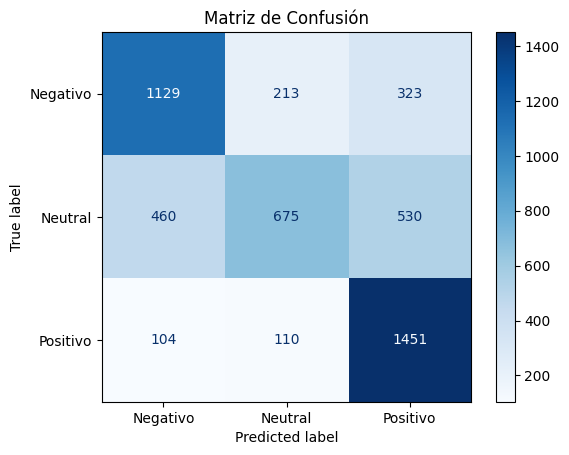

In [6]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt
labels = ["Negativo", "Neutral", "Positivo"]


ConfusionMatrixDisplay.from_predictions(y_true_numeric, res, display_labels=labels, cmap='Blues')
plt.title("Matriz de Confusión")
plt.show()
